# Insertion Sort and Merge Sort (implementation from ChatGPT)

In [25]:
# Python program for implementation of Insertion Sort (source geeksforgeeks.org)
# https://www.geeksforgeeks.org/insertion-sort-algorithm/

# Function to sort array using insertion sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1

        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key


# Python program for implementation of Merge Sort (source geeksforgeeks.org)
# https://www.geeksforgeeks.org/merge-sort/#implementation-of-merge-sort

def merge(arr, left, mid, right):
    n1 = mid - left + 1
    n2 = right - mid

    # Create temp arrays
    L = [0] * n1
    R = [0] * n2

    # Copy data to temp arrays L[] and R[]
    for i in range(n1):
        L[i] = arr[left + i]
    for j in range(n2):
        R[j] = arr[mid + 1 + j]

    i = 0  # Initial index of first subarray
    j = 0  # Initial index of second subarray
    k = left  # Initial index of merged subarray

    # Merge the temp arrays back
    # into arr[left..right]
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    # Copy the remaining elements of L[],
    # if there are any
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    # Copy the remaining elements of R[], 
    # if there are any
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

def merge_sort(arr, left, right):
    if left < right:
        mid = (left + right) // 2

        merge_sort(arr, left, mid)
        merge_sort(arr, mid + 1, right)
        merge(arr, left, mid, right)


# Test Sorts Work

In [26]:
# Test the sorting algorithms with an array
arr = [12, 11, 13, 5, 6]

# Create a copy of the array to avoid in-place sorting issues
arr_copy_for_insertion = arr.copy()
arr_copy_for_merge = arr.copy()

# Test insertion sort
insertion_sort(arr_copy_for_insertion)
print("Insertion Sort Result:", arr_copy_for_insertion)

# Test merge sort
merge_sort(arr_copy_for_merge, 0, len(arr_copy_for_merge) - 1)
print("Merge Sort Result:", arr_copy_for_merge)

Insertion Sort Result: [5, 6, 11, 12, 13]
Merge Sort Result: [5, 6, 11, 12, 13]


# Generate a random list of size n

In [27]:
import random
import numpy as np

# Function to generate a random list of integers between 0 and 1000 (Edit below)
def generate_random_list(size):
    return [random.randint(0, 1000) for _ in range(size)]

# Q2: Hybrid Sort

In [31]:
def insertion_sort_partial(arr, left, right):
    for i in range(left + 1, right + 1):
        key = arr[i]
        j = i - 1
        while j >= left and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def hybrid_merge_sort(arr, left, right, threshold=21):
    if left < right:
        if right - left + 1 <= threshold:
            insertion_sort_partial(arr, left, right)
        else:
            mid = (left + right) // 2

            hybrid_merge_sort(arr, left, mid, threshold)
            hybrid_merge_sort(arr, mid + 1, right, threshold)
            merge(arr, left, mid, right)

# Test the hybrid merge sort with an array
arr = generate_random_list(100)

# Create a copy of the array to avoid in-place sorting issues
arr_copy_for_hybrid = arr.copy()

# Test hybrid merge sort
hybrid_merge_sort(arr_copy_for_hybrid, 0, len(arr_copy_for_hybrid) - 1)
print("Hybrid Merge Sort Result:", arr_copy_for_hybrid)

Hybrid Merge Sort Result: [5, 17, 20, 25, 30, 41, 61, 67, 81, 103, 112, 132, 140, 142, 145, 158, 160, 162, 166, 178, 213, 218, 219, 232, 243, 253, 262, 264, 265, 288, 288, 294, 296, 296, 308, 309, 316, 325, 348, 359, 360, 363, 383, 392, 394, 395, 399, 430, 431, 440, 443, 444, 458, 471, 490, 497, 512, 529, 529, 546, 549, 576, 603, 608, 644, 649, 650, 654, 656, 657, 658, 691, 701, 709, 712, 740, 748, 757, 757, 758, 761, 768, 784, 803, 804, 808, 819, 850, 853, 859, 876, 879, 908, 919, 922, 946, 959, 960, 967, 976]


# Run our sort comparison and plot the times taken

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Total time taken for TimSort: 0.003970581299998913


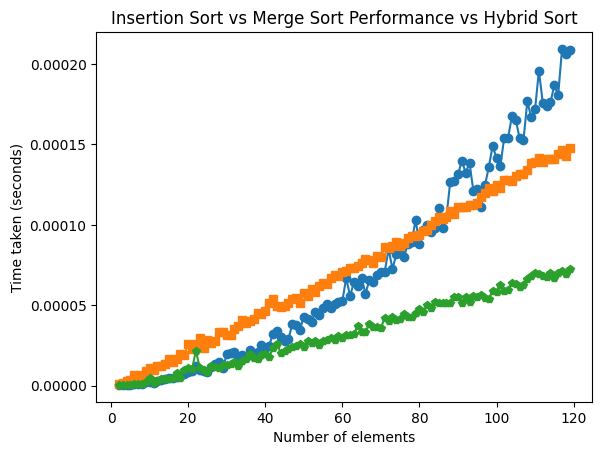

In [33]:
%pip install matplotlib
import timeit
import matplotlib.pyplot as plt

# We will run the function 1000 times (Edit below)
number_of_runs = 100

# generate a list of sizes, from 2 to 150 (Edit below)
sizes = list(range(2, 120))

x_values = []
y_values = []
z_values = []
a_values = []
timsort_total = 0

for size in sizes:
    # Generate a random list of size `size`
    arr = generate_random_list(size)

    # Wrap the functions in a lambda to prevent it from being executed
    # when passed to timeit
    my_function = lambda: insertion_sort(arr.copy())
    my_function2 = lambda: merge_sort(arr.copy(), 0, len(arr) - 1)
    my_function3 = lambda: hybrid_merge_sort(arr.copy(), 0, len(arr) - 1)

    # Calculate the average time taken for both functions
    duration = timeit.timeit(my_function, number=number_of_runs)
    time_per_run = duration / number_of_runs
    duration2 = timeit.timeit(my_function2, number=number_of_runs)
    time_per_run2 = duration2 / number_of_runs
    duration3 = timeit.timeit(my_function3, number=number_of_runs)
    time_per_run3 = duration3 / number_of_runs

    # Update lists for plotting
    x_values.append(size)
    y_values.append(time_per_run)
    z_values.append(time_per_run2)
    a_values.append(time_per_run3)
    timsort_total += time_per_run3

print("Total time taken for TimSort:", timsort_total)

# Plot the performance of insertion sort
plt.plot(x_values, y_values, label="Insertion Sort", marker='o')

# Plot the performance of another algorithm for comparison
plt.plot(x_values, z_values, label="Merge Sort", marker='s')

plt.plot(x_values, a_values, label="Hybrid Sort", marker='p')

# Add labels and title
plt.xlabel("Number of elements")
plt.ylabel("Time taken (seconds)")
plt.title("Insertion Sort vs Merge Sort Performance vs Hybrid Sort")

# Show plot
plt.show()

# Timsort k plotting

The best threshold value is: 21


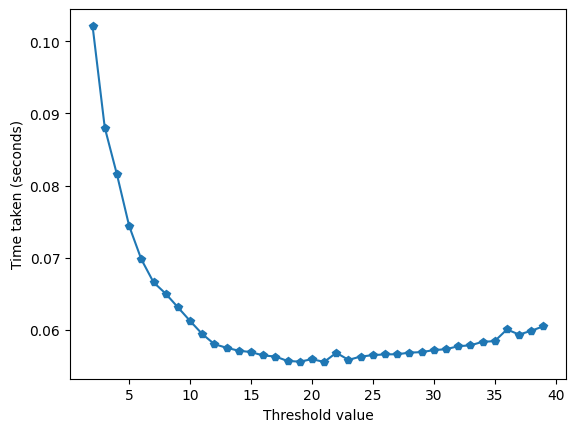

In [ ]:
# k sizes
k_sizes = list(range(2, 40))

k_values = []
time_values = []

def buncha_sorts(k):
    # We will run the function 20 times (Edit below)
    number_of_runs = 20

    # generate a list of sizes, from 2 to 1000 (Edit below)
    sizes = list(range(2, 100))

    timsort_total = 0

    for size in sizes:
        # Generate a random list of size `size`
        arr = generate_random_list(size)

        # Wrap the functions in a lambda to prevent it from being executed
        # when passed to timeit
        my_function3 = lambda: hybrid_merge_sort(arr.copy(), 0, len(arr) - 1, k)

        # Calculate the average time taken for both functions
        duration3 = timeit.timeit(my_function3, number=number_of_runs)
        time_per_run3 = duration3 / number_of_runs

        # Update lists for plotting
        timsort_total += time_per_run3


for k in k_sizes:
    number_of_runs = 20

    my_function = lambda: buncha_sorts(k)

    duration = timeit.timeit(my_function, number=number_of_runs)
    time_per_run = duration / number_of_runs
    
    k_values.append(k)
    time_values.append(time_per_run)

for i in range(len(time_values)):
    if time_values[i] is min(time_values):
        print("The best threshold value is:", k_values[i])

# Plot the performance of hybrid sort
plt.plot(k_values, time_values, label="Hybrid Sort", marker='p')

# Add labels and title
plt.xlabel("Threshold value")
plt.ylabel("Time taken (seconds)")

# Show plot
plt.show()